## Implementation

# Data Understanding



Import Libraries
 

In [1438]:
import numpy as np
import pandas as pd
import seaborn as sns
import heapq
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [1439]:
data = pd.read_csv("Data.csv",nrows=101)
data.head()

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13


In [1440]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [1441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 101 non-null    int64  
 1   Name               101 non-null    object 
 2   Gender             101 non-null    object 
 3   Field              101 non-null    object 
 4   Occupation         101 non-null    object 
 5   Age                101 non-null    int64  
 6   Openness           101 non-null    float64
 7   Extraversion       101 non-null    float64
 8   Agreeableness      101 non-null    float64
 9   Conscientiousness  101 non-null    float64
 10  Neuroticism        101 non-null    float64
 11  Interface_1        101 non-null    float64
 12  Interface_2        101 non-null    float64
 13  Interface_3        101 non-null    float64
 14  Interface_4        101 non-null    float64
 15  Interface_5        101 non-null    float64
 16  Interface_6        101 non

In [1442]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         6.930693
Interface_19         6.930693
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [1443]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [1444]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [1445]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [1446]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [1447]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000
mean,51.019802,22.188119,4.019802,3.287129,3.524752,2.648515,3.351485,6.871287,6.061386,6.043564,...,7.415842,6.514851,6.490099,7.118812,7.978218,6.102128,6.161702,9.564356,10.80198,10.435644
std,29.334274,5.942580,0.851237,1.253688,0.881409,1.439695,1.231959,1.686199,1.920571,1.970960,...,1.918631,2.269863,2.303237,1.725034,1.760375,2.030467,2.054220,4.517557,5.28965,5.378505
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,26.000000,20.000000,3.000000,2.000000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,6.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.00000,7.000000
50%,51.000000,21.000000,4.000000,3.000000,4.000000,3.000000,3.000000,7.000000,6.000000,6.000000,...,8.000000,7.000000,7.000000,7.000000,8.000000,6.102128,6.161702,10.000000,11.00000,10.000000
75%,76.000000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,16.00000,16.000000
max,102.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.00000,19.000000


In [1448]:
data.value_counts('Test_Score')

Test_Score
Gold      31
Blue      26
Orange    25
Green     19
dtype: int64

# Statistical analysis

In [1449]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Id,1.000000,-0.070000,0.020000,-0.110000,0.050000,-0.170000,0.060000,-0.040000,-0.110000,-0.080000,0.030000,-0.180000,-0.070000,-0.020000,0.060000,-0.010000,0.180000,-0.060000,-0.020000,0.040000,-0.200000,-0.200000,-0.070000,0.080000,-0.010000,0.030000,0.080000,0.030000,-0.150000
Age,-0.070000,1.000000,-0.000000,0.200000,0.200000,0.210000,0.020000,0.090000,0.070000,0.040000,0.170000,0.070000,0.130000,-0.020000,0.050000,0.060000,-0.090000,-0.010000,0.030000,0.040000,0.170000,0.180000,0.070000,-0.060000,0.180000,0.050000,0.010000,0.060000,0.040000
Openness,0.020000,-0.000000,1.000000,0.290000,0.050000,0.190000,0.040000,0.040000,0.030000,0.150000,0.140000,0.240000,0.110000,0.100000,0.090000,-0.020000,0.190000,0.040000,0.100000,0.220000,0.010000,-0.060000,0.140000,0.080000,0.100000,-0.020000,0.150000,-0.210000,-0.100000
Extraversion,-0.110000,0.200000,0.290000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.180000,0.110000,0.230000,0.100000,0.150000,0.050000,0.070000,0.080000,-0.010000,0.090000,0.060000,0.020000,0.070000,0.010000,0.180000,-0.070000,0.170000,-0.070000,-0.030000,-0.060000,0.000000
Agreeableness,0.050000,0.200000,0.050000,0.150000,1.000000,0.060000,0.140000,0.060000,0.070000,0.080000,0.050000,0.070000,-0.050000,-0.130000,-0.060000,0.070000,-0.210000,0.000000,0.050000,-0.080000,-0.030000,-0.010000,0.060000,-0.080000,0.060000,-0.020000,-0.040000,-0.140000,-0.070000
Conscientiousness,-0.170000,0.210000,0.190000,0.120000,0.060000,1.000000,0.040000,0.160000,0.180000,0.070000,0.010000,0.090000,0.160000,0.040000,0.070000,0.190000,-0.010000,0.180000,0.020000,0.160000,0.190000,0.110000,0.120000,0.140000,0.000000,0.020000,0.000000,-0.010000,0.080000
Neuroticism,0.060000,0.020000,0.040000,-0.050000,0.140000,0.040000,1.000000,0.250000,0.130000,0.260000,0.180000,0.170000,0.050000,0.040000,0.000000,0.070000,0.250000,0.120000,0.200000,0.120000,-0.060000,-0.040000,0.010000,-0.010000,0.090000,0.080000,-0.250000,-0.220000,-0.010000
Interface_1,-0.040000,0.090000,0.040000,0.010000,0.060000,0.160000,0.250000,1.000000,0.680000,0.750000,0.390000,0.490000,0.210000,0.130000,0.110000,0.150000,0.210000,0.530000,0.400000,0.230000,0.160000,0.280000,0.250000,0.400000,0.260000,0.230000,-0.350000,-0.310000,-0.280000
Interface_2,-0.110000,0.070000,0.030000,0.180000,0.070000,0.180000,0.130000,0.680000,1.000000,0.730000,0.390000,0.430000,0.310000,0.300000,0.270000,0.310000,0.210000,0.350000,0.320000,0.210000,0.240000,0.320000,0.240000,0.310000,0.340000,0.170000,-0.410000,-0.350000,-0.190000
Interface_3,-0.080000,0.040000,0.150000,0.110000,0.080000,0.070000,0.260000,0.750000,0.730000,1.000000,0.270000,0.350000,0.310000,0.230000,0.140000,0.150000,0.260000,0.420000,0.360000,0.190000,0.140000,0.250000,0.230000,0.340000,0.290000,0.160000,-0.300000,-0.270000,-0.290000


# get dynamic the highest and lowest interfaces along all the personalities

In [1450]:
data_1= data[data.columns[11:31]]


In [1451]:
import heapq

In [1452]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [1453]:
def get_index(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [1454]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
Orange_values


(9, 16, 10, 12, 8, 7, 11, 17)

In [1455]:
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [1456]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [1457]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]


In [1458]:
selected_interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_4864\2108893319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_interfaces['Test_Score']=data_1.iloc[:,-1]


In [1459]:
Interfaces=selected_interfaces

In [1460]:
Interfaces['Interface_2'] = selected_interfaces['Interface_2'].apply(lambda x: 1 if x >= 6 else 0) 
Interfaces['Interface_6'] = selected_interfaces['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_8'] = selected_interfaces['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_9'] = selected_interfaces['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_12'] = selected_interfaces['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_14'] = selected_interfaces['Interface_14'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_18'] = selected_interfaces['Interface_18'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_7'] = selected_interfaces['Interface_7'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_10'] = selected_interfaces['Interface_10'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_11'] = selected_interfaces['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_13'] = selected_interfaces['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_16'] = selected_interfaces['Interface_16'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_17'] = selected_interfaces['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  


C:\Users\HP\AppData\Local\Temp\ipykernel_4864\996942898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_2'] = selected_interfaces['Interface_2'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4864\996942898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_6'] = selected_interfaces['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4864\996942898.py:3: SettingWithCopyWarning: 
A value is 

# Machine learning using All interfaces

In [1461]:
New=data[data.columns[6:31]]
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



C:\Users\HP\AppData\Local\Temp\ipykernel_4864\4037034807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Test_Score'] = pd.factorize(New['Test_Score'])[0]


In [1462]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [1463]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


19.047619047619047

In [1464]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

47.61904761904761

In [1465]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


33.33333333333333

# Array of personality in 1s and 0s

In [1466]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [1467]:
y=y1
x=Interfaces[Interfaces.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

27.500000000000004
acc of KNN %  9.523809523809524
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5

   micro avg       0.50      0.10      0.16        21
   macro avg       0.25      0.10      0.14        21
weighted avg       0.24      0.10      0.14        21
 samples avg       0.10      0.10      0.10        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GReen

In [1468]:
dummy_df = pd.get_dummies(Interfaces, columns=['Test_Score'])

In [1469]:
Green_data=dummy_df

In [1470]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [1471]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:13]].values

In [1472]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [1473]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 


71.42857142857143


In [1474]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


86.25
71.42857142857143
F-score               precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.00      0.00      0.00         4

    accuracy                           0.71        21
   macro avg       0.39      0.44      0.42        21
weighted avg       0.64      0.71      0.67        21



In [1475]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

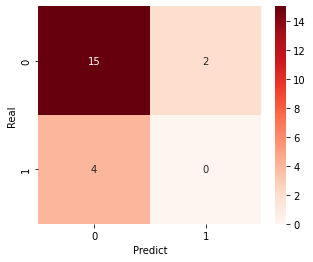

In [1476]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [1477]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


80.95238095238095

# Blue 

In [1478]:
Blue_data= dummy_df

In [1479]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [1480]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [1481]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

76.19047619047619

In [1482]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

82.5
acc of KNN %  85.71428571428571
F-score               precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.40      0.57         5

    accuracy                           0.86        21
   macro avg       0.92      0.70      0.74        21
weighted avg       0.88      0.86      0.83        21



In [1483]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,0
7,1,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

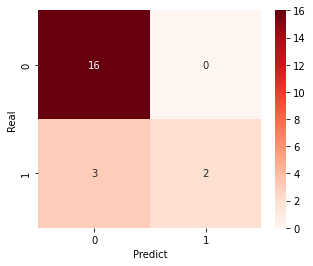

In [1484]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [1485]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


85.71428571428571

# GOld

In [1486]:
Gold_data= dummy_df

In [1487]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)
Gold_data

,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Gold
0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,0,1,1,1,1,0,1,1,1,0
3,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,1,0,1,1,1,1,0,1,1,1,1
97,0,0,1,1,0,1,1,1,1,0,1,1,1,0
98,0,1,1,1,1,1,1,0,1,1,1,1,1,1
99,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [1488]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:13]].values
x

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [1489]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [1490]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)



66.66666666666666


In [1491]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

77.5
66.66666666666666
F-score               precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [1492]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

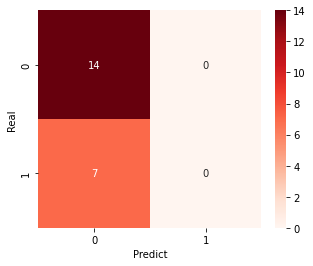

In [1493]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [1494]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


66.66666666666666

# Orange

In [1495]:
Orange_data= dummy_df

In [1496]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)
Orange_data

,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_16,Interface_17,Interface_18,Test_Score_Orange
0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,0,1,1,1,1,0,1,1,1,0
3,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,1,0,1,1,1,1,0,1,1,1,0
97,0,0,1,1,0,1,1,1,1,0,1,1,1,0
98,0,1,1,1,1,1,1,0,1,1,1,1,1,0
99,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [1497]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:13]].values

In [1498]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [1499]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

76.19047619047619

In [1500]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [1501]:
knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [1502]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

81.25
80.95238095238095
acc of KNN %  80.95238095238095
F-score               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.20      0.33         5

    accuracy                           0.81        21
   macro avg       0.90      0.60      0.61        21
weighted avg       0.85      0.81      0.76        21



In [1503]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

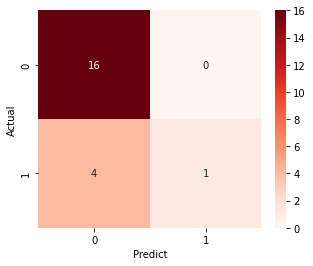

In [1504]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [1505]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


76.19047619047619

# Vector
 all interfaces in one array 

In [1506]:
y=New['Test_Score']
x=Interfaces[Interfaces.columns[:13]].values

In [1507]:
Y= y
X=x



In [1508]:
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.19,1:0.26,2:0.31,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

47.61904761904761

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

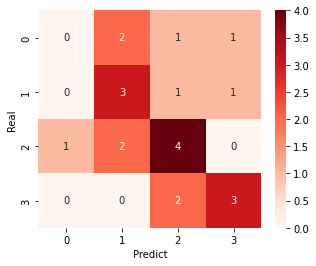

In [1509]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [1510]:
x = Interfaces[Interfaces.columns[:13]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



56.25
47.61904761904761
F-score               precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.60      0.60      0.60         5
           2       0.60      0.43      0.50         7
           3       0.50      0.40      0.44         5

    accuracy                           0.48        21
   macro avg       0.50      0.48      0.48        21
weighted avg       0.52      0.48      0.48        21



In [1511]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
26,1,3
86,1,1
2,0,0
55,1,1
75,3,0
94,2,0
16,1,2
73,1,1
54,0,1
96,2,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

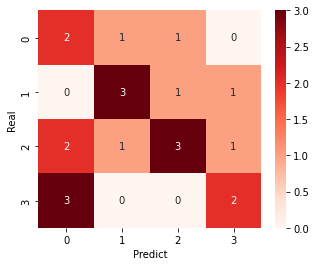

In [1512]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [1513]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

5.0


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


33.33333333333333

# Cross tab 

In [1514]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_13'], margins=True)


Interface_13,0,1,All
Test_Score,,,
Blue,2,24,26
Gold,4,27,31
Green,3,16,19
Orange,6,19,25
All,15,86,101


In [1515]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_7'], margins=True)

Interface_7,0,1,All
Test_Score,,,
Blue,5,21,26
Gold,5,26,31
Green,2,17,19
Orange,6,19,25
All,18,83,101


In [1516]:
pd.crosstab(index=Interfaces['Interface_13'], columns=Interfaces['Interface_7'], margins=True)

Interface_7,0,1,All
Interface_13,,,
0,4,11,15
1,14,72,86
All,18,83,101


In [1517]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_17'], margins=True)

Interface_17,0,1,All
Test_Score,,,
Blue,3,23,26
Gold,2,29,31
Green,2,17,19
Orange,2,23,25
All,9,92,101


In [1518]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_11'], margins=True)

Interface_11,0,1,All
Test_Score,,,
Blue,4,22,26
Gold,7,24,31
Green,5,14,19
Orange,4,21,25
All,20,81,101


In [1519]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_16'], margins=True)

Interface_16,0,1,All
Test_Score,,,
Blue,4,22,26
Gold,2,29,31
Green,6,13,19
Orange,6,19,25
All,18,83,101


# Cross tab lowest

In [1520]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_2'], margins=True)

Interface_2,0,1,All
Test_Score,,,
Blue,14,12,26
Gold,10,21,31
Green,7,12,19
Orange,10,15,25
All,41,60,101


In [1521]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_6'], margins=True)

Interface_6,0,1,All
Test_Score,,,
Blue,14,12,26
Gold,16,15,31
Green,7,12,19
Orange,8,17,25
All,45,56,101


In [1522]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_8'], margins=True)

Interface_8,0,1,All
Test_Score,,,
Blue,17,9,26
Gold,20,11,31
Green,8,11,19
Orange,11,14,25
All,56,45,101


In [1523]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_9'], margins=True)

Interface_9,0,1,All
Test_Score,,,
Blue,17,9,26
Gold,20,11,31
Green,8,11,19
Orange,14,11,25
All,59,42,101


In [1524]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_12'], margins=True)

Interface_12,0,1,All
Test_Score,,,
Blue,8,18,26
Gold,10,21,31
Green,9,10,19
Orange,12,13,25
All,39,62,101


In [1525]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_14'], margins=True)

Interface_14,0,1,All
Test_Score,,,
Blue,7,19,26
Gold,8,23,31
Green,7,12,19
Orange,7,18,25
All,29,72,101


In [1526]:
pd.crosstab(index=New1['Test_Score'], columns=New1['Interface_18'], margins=True)

Interface_18,0,1,All
Test_Score,,,
Blue,9,17,26
Gold,6,25,31
Green,8,11,19
Orange,11,14,25
All,34,67,101


# 6 Interfaces to KNN

In [1527]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(3, means_Green)
lowest_green = heapq.nsmallest(3, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(3, means_Blue)
lowest_blue = heapq.nsmallest(3, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(3, means_Gold)
lowest_gold = heapq.nsmallest(3, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(3, means_Orange)
lowest_orange = heapq.nsmallest(3, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [1528]:
def get_index(array1,array2,full_array):
    high1,high2,high3=array1
    low1,low2,low3=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    return index_high1,index_high2,index_high3,index_low1,index_low2,index_low3

In [1529]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [1530]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [1531]:
selected_factors

[5, 7, 8, 9, 10, 11, 12, 16]

In [1532]:
All_factors = [*selected_factors]
New_factors = data_1.iloc[:, All_factors]
# New_factors['Test_Score']=data_1.iloc[:,-1]


In [1533]:
Factors=New_factors
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,4.0,6.0,6.0,8.0,6.0,7.0,8.0,6.0
1,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0
2,8.0,6.0,5.0,9.0,8.0,6.0,8.0,9.0
3,5.0,5.0,4.0,5.5,6.0,6.5,7.5,7.5
4,7.0,5.0,8.0,7.0,6.0,4.0,8.0,8.0
...,...,...,...,...,...,...,...,...
96,4.0,6.0,2.0,9.0,6.0,8.0,7.0,6.0
97,4.0,6.0,2.0,9.0,6.0,8.0,7.0,6.0
98,8.0,7.5,8.0,9.0,7.0,5.0,7.0,9.0
99,2.0,1.0,2.0,8.0,3.0,2.0,7.0,8.0


In [1534]:
# extracted_col = data[["Age", "Openness", "Extraversion", "Agreeableness", "Conscientiousness","Neuroticism"]]
# Factors = Factors.join(extracted_col)

In [1535]:
Factors['Interface_6'] = New_factors['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_8'] = New_factors['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_9'] = New_factors['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_12'] = New_factors['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_10'] = New_factors['Interface_10'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_11'] = New_factors['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_13'] = New_factors['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_17'] = New_factors['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  


C:\Users\HP\AppData\Local\Temp\ipykernel_4864\961762804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Interface_6'] = New_factors['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4864\961762804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Interface_8'] = New_factors['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4864\961762804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [1536]:

Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1
2,1,1,0,1,1,1,1,1
3,0,0,0,0,1,1,1,1
4,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
96,0,1,0,1,1,1,1,1
97,0,1,0,1,1,1,1,1
98,1,1,1,1,1,0,1,1
99,0,0,0,1,0,0,1,1


In [1537]:
Factors['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_4864\2639090068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Test_Score']=data_1.iloc[:,-1]


In [1539]:
x = Factors[Factors.columns[:8]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


41.25
23.809523809523807
F-score               precision    recall  f1-score   support

           0       0.21      0.75      0.33         4
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         7
           3       1.00      0.20      0.33         5

    accuracy                           0.24        21
   macro avg       0.39      0.29      0.23        21
weighted avg       0.36      0.24      0.20        21



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

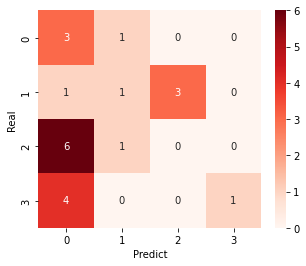

In [1540]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# deep


In [1541]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, Flatten
from keras.models import Sequential
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [1542]:


y=np.full([len(data['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(data['Test_Score'])):
    if data['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif data['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif data['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1 

In [1543]:

x = New.drop(['Test_Score'],axis = 1)

Y= y1
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)



In [1544]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(101, activation='relu'))
model.add(tf.keras.layers.Dense(4,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

loss,acc_T=model.evaluate(x_test, y_test)
print("loss", loss)
print("accuracy:" , acc_T)

Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.2875
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.2375
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.2500
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.2875
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.3125
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.3000
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.3250
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1887 - accuracy: 0.3750
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.3250
Epoch 11/100
3/3 [===========